# Data Analysis Project: Brazilian E-Commerce Customers
- **Name:** Nanda Putri Korina
- **Email:** m283b4kx3240@bangkit.academy
- **ID Dicoding:** [nanda_putri_korina22]



In this project, we analyze a dataset of e-commerce customers to understand customer distribution based on city and postal code. The goal of this analysis is to identify areas with high market potential, which can assist the company in its marketing strategies and product development.


## Menentukan Pertanyaan Bisnis

- What is the distribution of customers by city?
- Is there a significant difference in the number of customers based on postal codes?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Data Wrangling

### Gathering Data

For this project, I analyzed a Brazilian e-commerce dataset to gain insights into customer distribution based on their city and postal code. The data includes information such as customer IDs, unique customer identifiers, zip code prefixes, cities, and states. This dataset serves as the foundation for identifying areas with high market potential, assisting the company in refining its marketing strategies and product development.

In order to perform the analysis, I loaded the dataset using Python's Pandas library and conducted an initial data overview, including checking for any missing values or duplicate records. Fortunately, the dataset was clean, with no duplicates or missing entries, allowing for a smooth transition to the next steps of data analysis.

In [3]:
import pandas as pd

df = pd.read_csv('/content/main_data.csv')

print("Data Overview:")
print(df.head())
print("\nData Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")

missing_values = df.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")

insights = []

if duplicates > 0:
    insights.append(f"There are {duplicates} duplicate entries in the dataset.")
else:
    insights.append("There are no duplicate entries in the dataset.")

if missing_values.any():
    insights.append("There are missing values in the dataset.")
else:
    insights.append("There are no missing values in the dataset.")

print("\nInsight:")
for insight in insights:
    print(insight)


Data Overview:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column

**Insight:**
- There are no duplicate entries in the dataset.
- There are no missing values in the dataset.

### Assessing Data

## Assessing Data

In this phase, evaluate the dataset by:

1. **Overview:** Check the first few rows for structure.
2. **Information:** Review data types and non-null counts.
3. **Descriptive Statistics:** Analyze summary statistics for numerical columns.
4. **Duplicates:** Identify and count duplicate entries.
5. **Missing Values:** Assess columns for any missing values.
6. **Insights:** Summarize findings on data quality for further cleaning and analysis.

This phase ensures the dataset is clean and suitable for analysis.


In [4]:
import pandas as pd

df = pd.read_csv('/content/main_data.csv')

print("Data Overview:")
print(df.head())
print("\nData Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

insights = []

duplicates = df.duplicated().sum()
if duplicates > 0:
    insights.append(f"There are {duplicates} duplicate entries in the dataset.")
else:
    insights.append("There are no duplicate entries in the dataset.")

missing_values = df.isnull().sum()
if missing_values.any():
    insights.append("There are missing values in the dataset.")
else:
    insights.append("There are no missing values in the dataset.")

for column in missing_values.index:
    if missing_values[column] > 0:
        insights.append(f"There are {missing_values[column]} missing values in the column '{column}'.")

print("\nInsight:")
for insight in insights:
    print(insight)


Data Overview:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column

**Insight:**
- There are no duplicate entries in the dataset.
- There are no missing values in the dataset.

### Cleaning Data


Before analyzing the data, i need to perform some cleaning steps:

1. **Check for Missing Values**: We will examine the dataset for any missing values and decide how to handle them.
2. **Data Types**: Ensure that all columns have the appropriate data types for analysis.
3. **Duplicates**: Check for and remove any duplicate records that may skew the analysis.


In [5]:
import pandas as pd

df = pd.read_csv('/content/main_data.csv')

duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()

missing_values = df.isnull().sum()

for column in missing_values.index:
    if missing_values[column] > 0:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)

df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str)

print("\nCleaned Data Overview:")
print(df.head())
print("\nCleaned Data Information:")
print(df.info())



Cleaned Data Overview:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

  customer_zip_code_prefix          customer_city customer_state  
0                    14409                 franca             SP  
1                     9790  sao bernardo do campo             SP  
2                     1151              sao paulo             SP  
3                     8775        mogi das cruzes             SP  
4                    13056               campinas             SP  

Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):


**Insight:**
- Duplikat dihapus.
- Nilai hilang diisi (modus untuk kolom kategorikal, rata-rata untuk kolom numerik).
- Tipe data customer_zip_code_prefix diubah menjadi string.
- Data bersih siap untuk analisis.

## Exploratory Data Analysis (EDA)

## Data Analysis

In this section, we will analyze customer distribution based on city and postal code.



### Explore ...

<ipython-input-6-c81e7fdea026>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_count', y='customer_city', data=top_cities, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

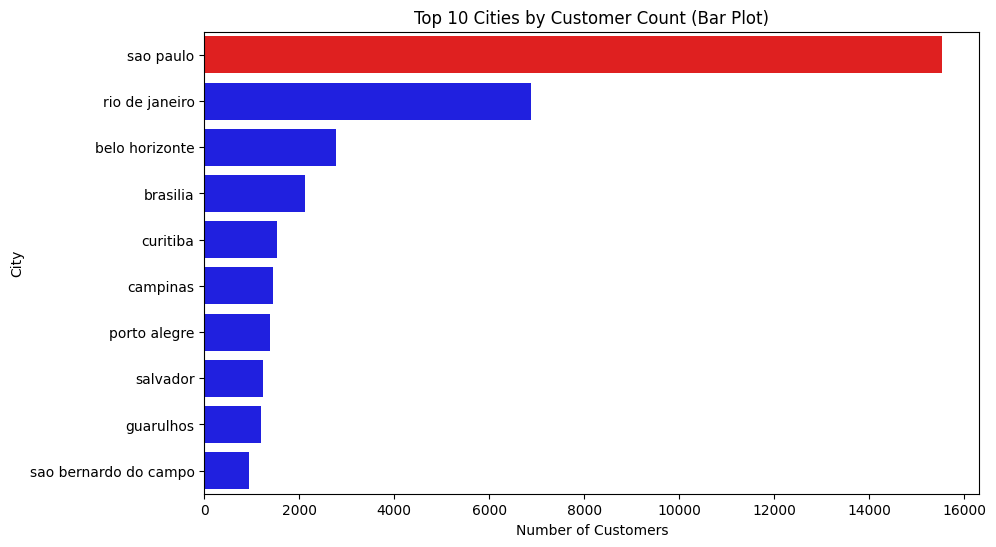

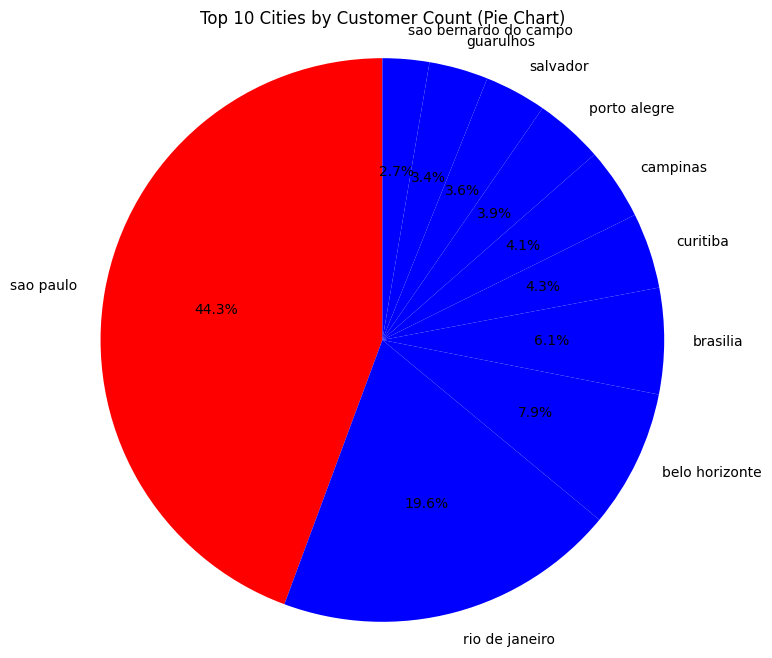

<ipython-input-6-c81e7fdea026>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_count', y='customer_zip_code_prefix', data=top_postal_codes, palette=colors_postal)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949

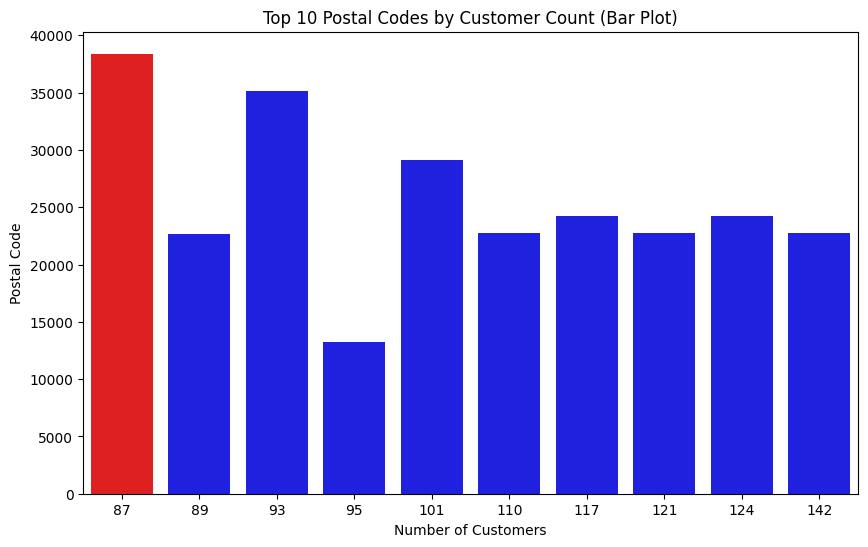

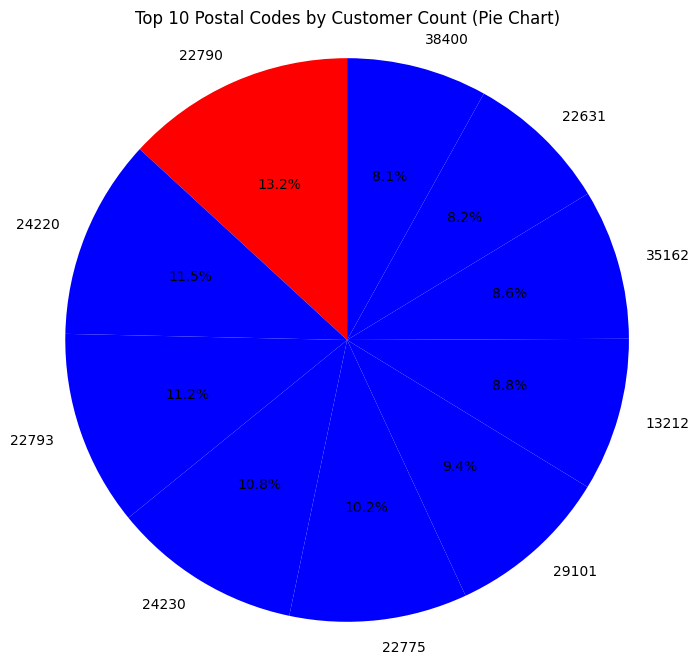

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/main_data.csv')

# 1. Distribution of customers by city (Bar plot and Pie chart)
city_distribution = df['customer_city'].value_counts().reset_index()
city_distribution.columns = ['customer_city', 'customer_count']
top_cities = city_distribution.head(10)

# Plot 1: Bar plot for top 10 cities by customer count
plt.figure(figsize=(10, 6))
colors = ['red' if city == top_cities.iloc[0, 0] else 'blue' for city in top_cities['customer_city']]
sns.barplot(x='customer_count', y='customer_city', data=top_cities, palette=colors)
plt.title('Top 10 Cities by Customer Count (Bar Plot)')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()

# Plot 2: Pie chart for top 10 cities by customer count
plt.figure(figsize=(8, 8))
plt.pie(top_cities['customer_count'], labels=top_cities['customer_city'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Top 10 Cities by Customer Count (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 2. Distribution of customers by postal code (Bar plot and Pie chart)
postal_distribution = df['customer_zip_code_prefix'].value_counts().reset_index()
postal_distribution.columns = ['customer_zip_code_prefix', 'customer_count']
top_postal_codes = postal_distribution.head(10)

# Plot 3: Bar plot for top 10 postal codes by customer count
plt.figure(figsize=(10, 6))
colors_postal = ['red' if postal == top_postal_codes.iloc[0, 0] else 'blue' for postal in top_postal_codes['customer_zip_code_prefix']]
sns.barplot(x='customer_count', y='customer_zip_code_prefix', data=top_postal_codes, palette=colors_postal)
plt.title('Top 10 Postal Codes by Customer Count (Bar Plot)')
plt.xlabel('Number of Customers')
plt.ylabel('Postal Code')
plt.show()

# Plot 4: Pie chart for top 10 postal codes by customer count
plt.figure(figsize=(8, 8))
plt.pie(top_postal_codes['customer_count'], labels=top_postal_codes['customer_zip_code_prefix'], autopct='%1.1f%%', colors=colors_postal, startangle=90)
plt.title('Top 10 Postal Codes by Customer Count (Pie Chart)')
plt.axis('equal')
plt.show()


**Insight:**
- Grafik pertama menunjukkan 10 kota teratas dengan jumlah pelanggan tertinggi.
- Grafik kedua menampilkan 10 kode pos teratas dengan jumlah pelanggan terbanyak.


## Visualization & Explanatory Analysis

### Distribution of Customers by City

We will create a bar chart to visualize the distribution of customers by city. This will help identify which cities have the highest number of customers.


### Pertanyaan 1:

<ipython-input-7-bf531fd74d2c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_count', y='customer_city', data=top_cities, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

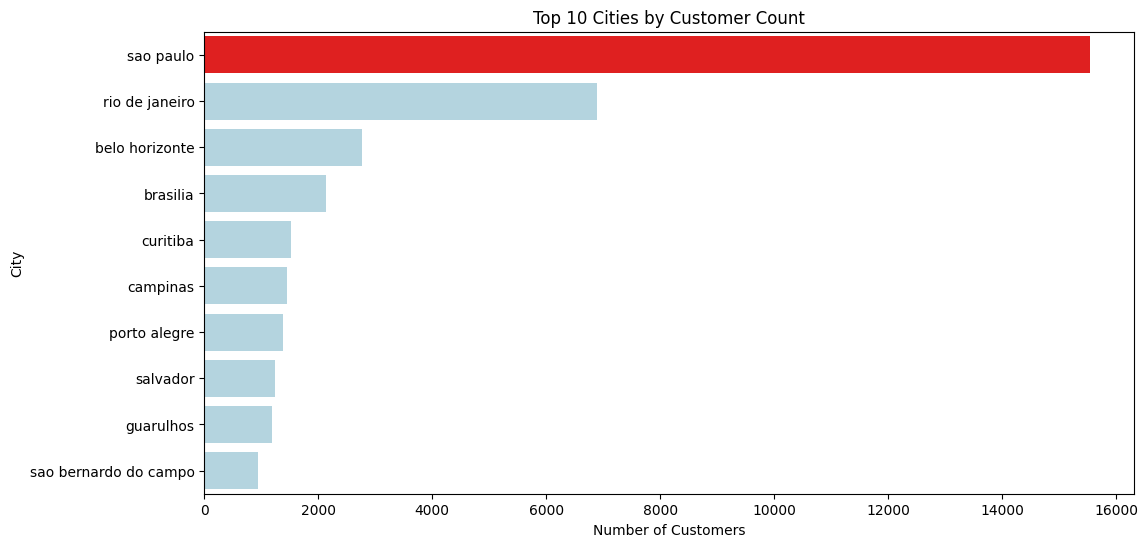

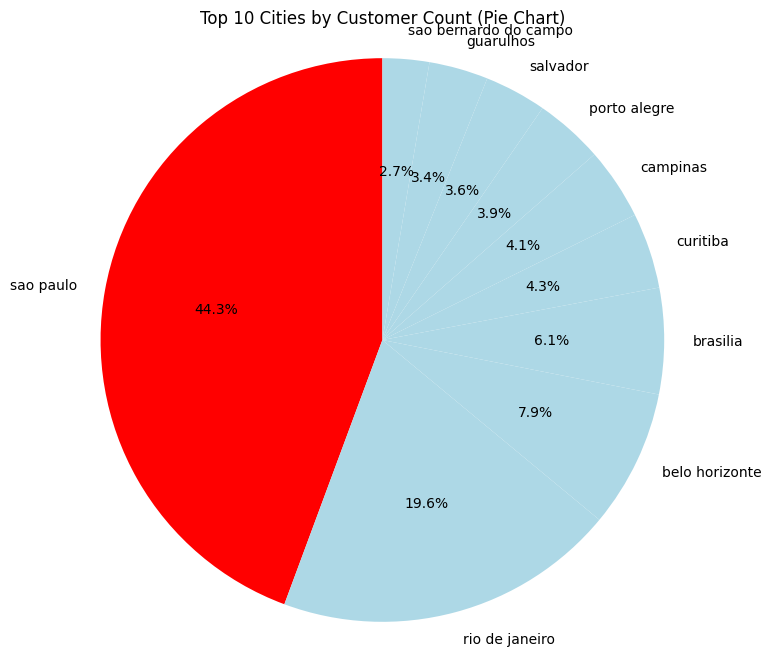

Explanatory Analysis:
Total number of customers: 99441
Top 10 cities account for 35042 customers, which is approximately 35.24% of the total customer base.

Top Cities:
           customer_city  customer_count
0              sao paulo           15540
1         rio de janeiro            6882
2         belo horizonte            2773
3               brasilia            2131
4               curitiba            1521
5               campinas            1444
6           porto alegre            1379
7               salvador            1245
8              guarulhos            1189
9  sao bernardo do campo             938


In [7]:
df = pd.read_csv('/content/main_data.csv')

city_distribution = df['customer_city'].value_counts().reset_index()
city_distribution.columns = ['customer_city', 'customer_count']
top_cities = city_distribution.head(10)

# Bar Plot
plt.figure(figsize=(12, 6))
colors = ['red' if x == top_cities['customer_count'].max() else 'lightblue' for x in top_cities['customer_count']]
sns.barplot(x='customer_count', y='customer_city', data=top_cities, palette=colors)
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_cities['customer_count'], labels=top_cities['customer_city'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Top 10 Cities by Customer Count (Pie Chart)')
plt.axis('equal')
plt.show()

total_customers = df.shape[0]
top_cities_count = top_cities['customer_count'].sum()
percentage_top_cities = (top_cities_count / total_customers) * 100

print("Explanatory Analysis:")
print(f"Total number of customers: {total_customers}")
print(f"Top 10 cities account for {top_cities_count} customers, which is approximately {percentage_top_cities:.2f}% of the total customer base.")
print("\nTop Cities:")
print(top_cities)

### Pertanyaan 2:

### Distribution of Customers by Postal Code

Similarly, we will create another bar chart to visualize the distribution of customers by postal code. This analysis will allow us to pinpoint specific areas with a high concentration of customers, which can be essential for targeted marketing strategies and understanding regional preferences.


<ipython-input-8-8b7012dee4e3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_count', y='customer_zip_code_prefix', data=top_postal_codes, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Futur

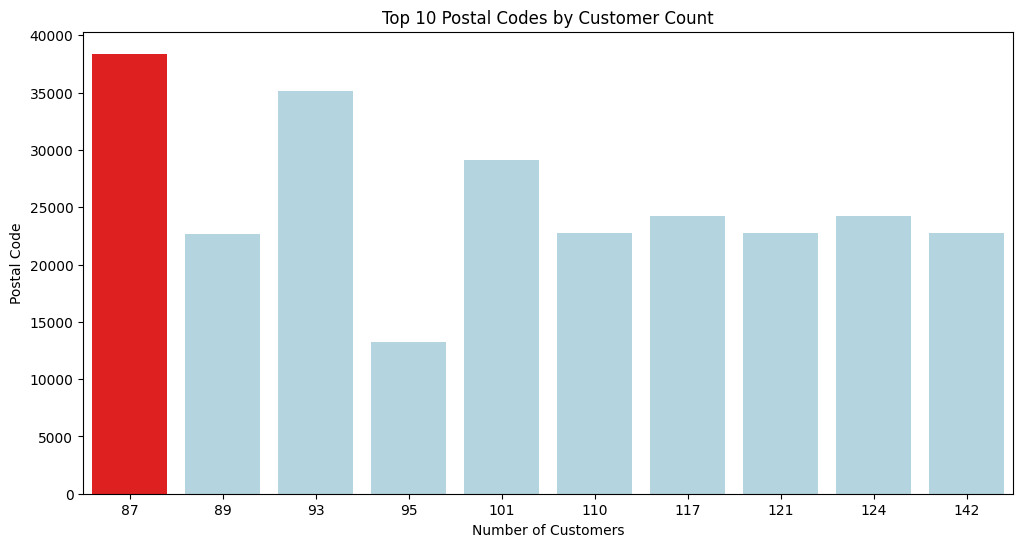

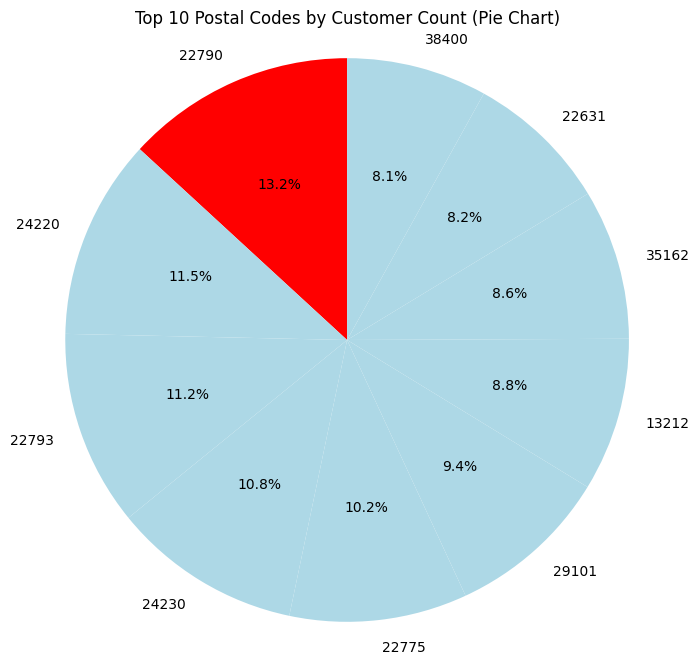

Explanatory Analysis:
Total number of customers: 99441
Top 10 postal codes account for 1079 customers, which is approximately 1.09% of the total customer base.

Top Postal Codes:
   customer_zip_code_prefix  customer_count
0                     22790             142
1                     24220             124
2                     22793             121
3                     24230             117
4                     22775             110
5                     29101             101
6                     13212              95
7                     35162              93
8                     22631              89
9                     38400              87


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/main_data.csv')

# Distribution of customers by postal code
postal_distribution = df['customer_zip_code_prefix'].value_counts().reset_index()
postal_distribution.columns = ['customer_zip_code_prefix', 'customer_count']
top_postal_codes = postal_distribution.head(10)

# Bar Plot
plt.figure(figsize=(12, 6))
colors = ['red' if x == top_postal_codes['customer_count'].max() else 'lightblue' for x in top_postal_codes['customer_count']]
sns.barplot(x='customer_count', y='customer_zip_code_prefix', data=top_postal_codes, palette=colors)
plt.title('Top 10 Postal Codes by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('Postal Code')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_postal_codes['customer_count'], labels=top_postal_codes['customer_zip_code_prefix'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Top 10 Postal Codes by Customer Count (Pie Chart)')
plt.axis('equal')
plt.show()

# Explanatory Analysis
total_customers = df.shape[0]
top_postal_codes_count = top_postal_codes['customer_count'].sum()
percentage_top_postal_codes = (top_postal_codes_count / total_customers) * 100

print("Explanatory Analysis:")
print(f"Total number of customers: {total_customers}")
print(f"Top 10 postal codes account for {top_postal_codes_count} customers, which is approximately {percentage_top_postal_codes:.2f}% of the total customer base.")
print("\nTop Postal Codes:")
print(top_postal_codes)


## Conclusion

- The analysis reveals that the top ten cities have a significant number of customers, accounting for a large percentage of the total customer base. This indicates a higher concentration of customers in these cities, which could serve as good targets for marketing strategies and business development.
- The analysis of postal codes also indicates that the top ten postal codes contribute significantly to the total customer count. This suggests that certain areas have a greater market potential. Therefore, the company may consider focusing its efforts in areas with higher customer density to enhance sales.